# Corelation matrices for 3 types of data
We are here using the table EV3 from the second paper. 
Here is the README:
Tissue specific mRNA (median across replicates, FPKM-log10), protein (iBAQ-log10) measurements and protein-to-mRNA ratios (log10) of 11,575 transcripts considered in the study. Values that are 0 in natural scale, and FPKM values smaller than 1 in log10 scale are encoded as missing values (NA).
We first draw correlation maps, along with PCA for every three table. 


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import requests, sys #to communicate with Ensembl servers
import json 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

newFrame=pd.read_csv('Table_EV3/Table_EV3.csv')

subFrame=newFrame.iloc[:,4:].copy()
# 
# 
subFrame = subFrame.replace('NA', np.nan, regex=True)                    
                         

# subFrame.plot()
# plt.gca().legend_.remove()
# plt.savefig('Concentration.png')
# plt.show()



In [3]:
# subFrame=subFrame.astype('float64)
# subFrame=subFrame.fillna(0)
# subFrame=subFrame.astype('float64)
subFrame.head(5)

subFrame=subFrame.apply(pd.to_numeric)
mRNA_cols = [col for col in subFrame.columns if '_mRNA' in col]

PTR_cols = [col for col in subFrame.columns if '_PTR' in col]
protein_cols = [col for col in subFrame.columns if '_protein' in col]
len(mRNA_cols)

Adrenal_mRNA Appendices_mRNA Brain_mRNA Colon_mRNA Duodenum_mRNA  \
0          NaN           1.073        NaN        NaN           NaN   
1          NaN             NaN        NaN      1.971         2.324   
2        3.154           3.021      2.824      3.321         3.006   
3          NaN             NaN      1.355        NaN           NaN   
4        1.625           1.567        NaN        NaN           NaN   

  Endometrium_mRNA Esophagus_mRNA Fallopiantube_mRNA Fat_mRNA  \
0              NaN            NaN              1.054      NaN   
1              NaN            NaN                NaN      NaN   
2            3.344          3.412              2.659    3.653   
3              NaN          3.248                NaN      NaN   
4              NaN          1.691              1.564      NaN   

  Gallbladder_mRNA  ... Rectum_PTR Salivarygland_PTR Smallintestine_PTR  \
0              NaN  ...        NaN             7.718                NaN   
1            1.569  ...      5.147               NaN              5.202   
2            3.569  ...      6.081             5.726              5.699   
3              NaN  ...        NaN               NaN                NaN   
4              NaN  ...      4.731             4.508                NaN   

  Smoothmuscle_PTR Spleen_PTR Stomach_PTR Testis_PTR Thyroid_PTR Tonsil_PTR  \
0              NaN      7.313         NaN        NaN         NaN        NaN   
1              NaN        NaN      5.8143        NaN         NaN        NaN   
2            4.997      5.136      6.5349       5.82        6.06      5.675   
3              NaN        NaN         NaN       2.35         NaN      5.249   
4              NaN        NaN      4.0613      4.832         NaN        NaN   

  Urinarybladder_PTR  
0                NaN  
1                NaN  
2             5.8286  
3                NaN  
4              4.243  

[5 rows x 87 columns]

29

AttributeError: 'ClusterGrid' object has no attribute 'get_figure'

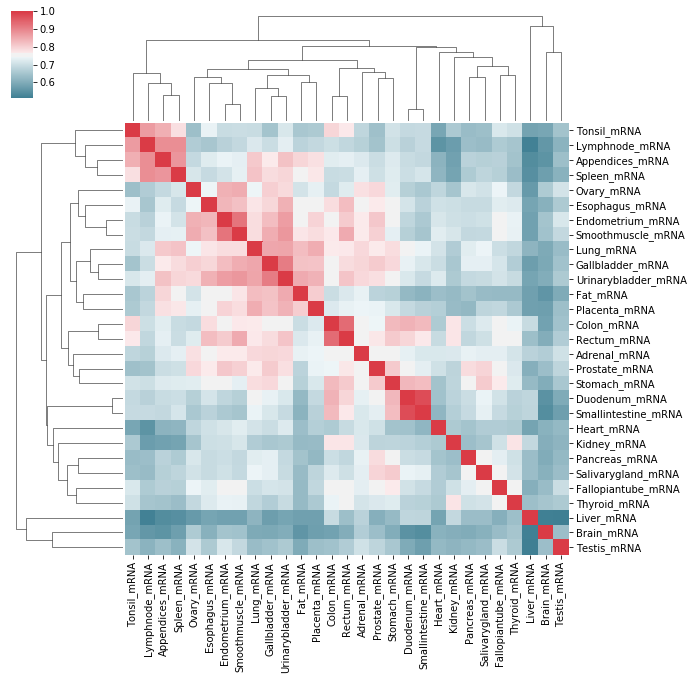

In [4]:
import seaborn as sns

corr = subFrame.loc[:,mRNA_cols].corr()
sns_plot=sns.clustermap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
figure = sns_plot.get_figure()    
figure.savefig('Figures/CorrelationClusterRNA.png', dpi=400, transparent=True, bbox_inches='tight')
corr.to_csv('Figures/CorrelationClustermRNA.csv')

AttributeError: 'ClusterGrid' object has no attribute 'get_figure'

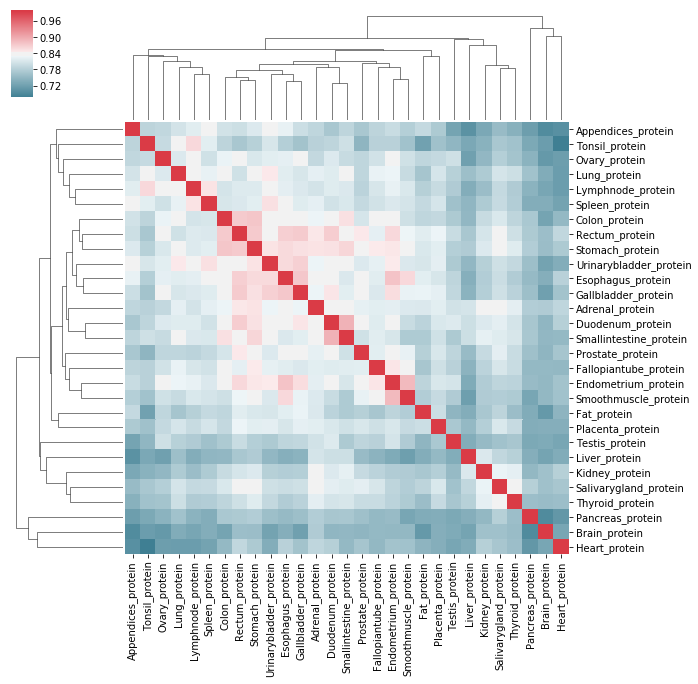

In [5]:
import seaborn as sns

corr = subFrame.loc[:,protein_cols].corr()
sns_plot=sns.clustermap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
figure = sns_plot.get_figure()    
figure.savefig('Figures/CorrelationHeatmapProtein.png', dpi=400, transparent=True, bbox_inches='tight')
corr.to_csv('Figures/CorrelationHeatmapProtein.csv')

AttributeError: 'ClusterGrid' object has no attribute 'get_figure'

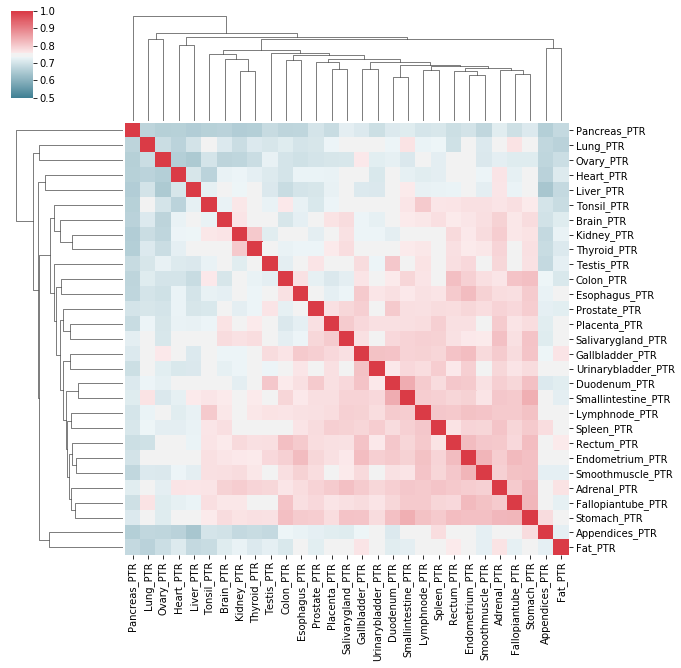

In [8]:
import seaborn as sns

corr = subFrame.loc[:,PTR_cols].corr()
sns_plot=sns.clustermap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
                        vmin=0.5, vmax=1,
            cmap=sns.diverging_palette(220, 10, as_cmap=True))
figure = sns_plot.get_figure()    
figure.savefig('Figures/CorrelationHeatmapPTR.png', dpi=400, transparent=True, bbox_inches='tight')
corr.to_csv('Figures/CorrelationHeatmapPTR.csv')

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

<BarContainer object of 19 artists>

Text(0, 0.5, 'Percentage of Explained Variance')

Text(0.5, 0, 'Principal Component')

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19]), <a list of 19 Text xticklabel objects>)

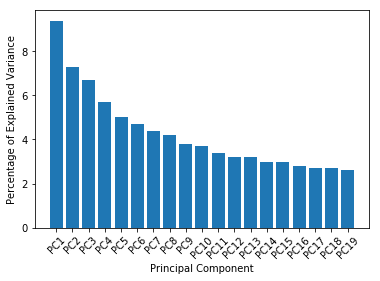

In [13]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import matplotlib.pyplot as plt # NOTE: This was tested with matplotlib v. 2.1.0
data=subFrame.loc[:,protein_cols]
inp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
data=inp_mean.fit_transform(data)
scaled_data = preprocessing.scale(data.T)

pca = PCA(0.80) # create a PCA object
pca.fit(scaled_data) # do the math
pca_data = pca.transform(scaled_data) # get PCA coordinates for scaled_data
 
#########################
#
# Draw a scree plot and a PCA plot
#
#########################
 
#The following code constructs the Scree plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.xticks(rotation=45)
plt.savefig('PCExplainedVarianceProtein.png')
plt.show()



Text(0.5, 0, 'PC1 - 9.4%')

Text(0, 0.5, 'PC2 - 7.3%')

Text(21.418755190977578, 12.07424501010082, 'Adrenal_protein')

Text(-44.00776475947576, -31.820747156424325, 'Appendices_protein')

Text(55.48898802816323, 98.43198878641908, 'Brain_protein')

Text(-15.61855874933636, -13.35700194798372, 'Colon_protein')

Text(2.491075830785408, 4.1869390312685155, 'Duodenum_protein')

Text(-22.196045673737025, 14.729922530125611, 'Endometrium_protein')

Text(-15.755684169893566, -16.56983476014403, 'Esophagus_protein')

Text(-14.115759633230814, 27.993248097315316, 'Fallopiantube_protein')

Text(6.379625130175489, -49.62743105613455, 'Fat_protein')

Text(-18.37677044328441, -18.994946449079567, 'Gallbladder_protein')

Text(82.32865971272706, -28.51641139650066, 'Heart_protein')

Text(60.07105072818767, -17.24271602021153, 'Kidney_protein')

Text(59.2595310862889, -22.971959183912084, 'Liver_protein')

Text(-35.18859839508683, 28.881093917499673, 'Lung_protein')

Text(-40.14781502963342, 3.3790497335310357, 'Lymphnode_protein')

Text(-31.156644165119072, -1.8776851161556332, 'Ovary_protein')

Text(10.274801767155829, -29.636322394627882, 'Pancreas_protein')

Text(-4.209359267513157, 0.3410637471895802, 'Placenta_protein')

Text(5.101986908154411, -2.7636540683237323, 'Prostate_protein')

Text(0.8556380988088027, -12.023914738999974, 'Rectum_protein')

Text(32.849069583889374, -8.029820119514051, 'Salivarygland_protein')

Text(-2.240704347493588, 0.7522266858731845, 'Smallintestine_protein')

Text(-10.805091184578323, 7.279577555556893, 'Smoothmuscle_protein')

Text(-24.131998756234623, -11.876980513314487, 'Spleen_protein')

Text(-4.243915877029241, -8.38205419463611, 'Stomach_protein')

Text(-8.661226917996405, 70.16848965922804, 'Testis_protein')

Text(34.99908424034407, 5.3834111234100614, 'Thyroid_protein')

Text(-49.730269240657364, 15.890635938262319, 'Tonsil_protein')

Text(-30.93205969535783, -15.800412699817787, 'Urinarybladder_protein')

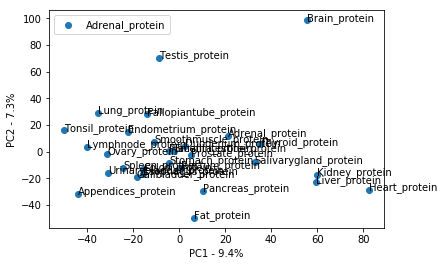

In [15]:
 
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=protein_cols, columns=labels)
 
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
plt.legend(pca_df.index) 
plt.savefig('PCAdim2Protein.png')
plt.show()



In [15]:

# Plot initialisation
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df.PC1, pca_df.PC2, pca_df.PC3, c=my_color, cmap="Set2_r", s=60)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(pca_df.PC1), max(pca_df.PC1)), (0, 0), (0,0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')
yAxisLine = ((0, 0), (min(pca_df.PC2), max(pca_df.PC2)), (0,0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')
zAxisLine = ((0, 0), (0,0), (min(pca_df.PC3), max(pca_df.PC3)))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on the iris data set")
#plt.show()


ValueError: Unknown projection '3d'

<Figure size 432x288 with 0 Axes>

In [26]:
#code for CodonTable fonction 
from Bio.Seq import Seq
from Bio.Alphabet import IUPAC
my_seq = Seq("GATCGATGGGCCTATATAGGATCGAAAATCGC", IUPAC.unambiguous_dna)


# def CodonTo64 (my_seq):
#     CodonsDict = { 
#     "TTT": 0, "TTC": 1, "TTA": 2, "TTG": 3, "CTT": 4, 
#     "CTC": 5, "CTA": 6, "CTG": 7, "ATT": 8, "ATC": 9, 
#     "ATA": 10, "ATG": 11, "GTT": 12, "GTC": 13, "GTA": 14, 
#     "GTG": 15, "TAT": 16, "TAC": 17, "TAA": 18, "TAG": 19, 
#     "CAT": 20, "CAC": 21, "CAA": 22, "CAG": 23, "AAT": 24, 
#     "AAC": 25, "AAA": 26, "AAG": 27, "GAT": 28, "GAC": 29, 
#     "GAA": 30, "GAG": 31, "TCT": 32, "TCC": 33, "TCA": 34, 
#     "TCG": 35, "CCT": 36, "CCC": 37, "CCA": 38, "CCG": 39, 
#     "ACT": 40, "ACC": 41, "ACA": 42, "ACG": 43, "GCT": 44, 
#     "GCC": 45, "GCA": 46, "GCG": 37, "TGT": 38, "TGC": 49, 
#     "TGA": 50, "TGG": 51, "CGT": 52, "CGC": 53, "CGA": 54, 
#     "CGG": 55, "AGT": 56, "AGC": 57, "AGA": 58, "AGG": 59, 
#     "GGT": 60, "GGC": 61, "GGA": 62, "GGG": 63} 
#     output =[]
#     list_nucleotides =[my_seq[i:i+3] for i in range(0, len(my_seq), 3)]
#     NumberCodons=0     
#     for nucleotide in list_nucleotides:
#         if not nucleotide in CodonsDict:
#             continue

#         else:
#             output.append(CodonsDict[nucleotide])
#             NumberCodons+=1
#     output=np.array(output)
#     return output

# print(CodonTo64(my_seq))



def CodonTo64 (my_seq):
    CodonsDict = { 
    "TTT": 0, "TTC": 1, "TTA": 2, "TTG": 3, "CTT": 4, 
    "CTC": 5, "CTA": 6, "CTG": 7, "ATT": 8, "ATC": 9, 
    "ATA": 10, "ATG": 11, "GTT": 12, "GTC": 13, "GTA": 14, 
    "GTG": 15, "TAT": 16, "TAC": 17, "TAA": 18, "TAG": 19, 
    "CAT": 20, "CAC": 21, "CAA": 22, "CAG": 23, "AAT": 24, 
    "AAC": 25, "AAA": 26, "AAG": 27, "GAT": 28, "GAC": 29, 
    "GAA": 30, "GAG": 31, "TCT": 32, "TCC": 33, "TCA": 34, 
    "TCG": 35, "CCT": 36, "CCC": 37, "CCA": 38, "CCG": 39, 
    "ACT": 40, "ACC": 41, "ACA": 42, "ACG": 43, "GCT": 44, 
    "GCC": 45, "GCA": 46, "GCG": 37, "TGT": 38, "TGC": 49, 
    "TGA": 50, "TGG": 51, "CGT": 52, "CGC": 53, "CGA": 54, 
    "CGG": 55, "AGT": 56, "AGC": 57, "AGA": 58, "AGG": 59, 
    "GGT": 60, "GGC": 61, "GGA": 62, "GGG": 63} 
    output =[]
    list_nucleotides =[my_seq[i:i+3] for i in range(0, len(my_seq), 3)]
    NumberCodons=0     
    for nucleotide in list_nucleotides:
        if not nucleotide in CodonsDict:
            continue

        else:
            output.append(CodonsDict[nucleotide])
            NumberCodons+=1

    return output

print(CodonTo64(my_seq))

[28, 54, 51, 45, 16, 10, 62, 35, 26, 9]


In [27]:
SeqFrame=pd.read_csv('Table_EV4/Table_EV4.csv' )
CodonTo64(SeqFrame['CDS_Sequence'][0])
X=[CodonTo64(CDS) for CDS in SeqFrame['CDS_Sequence']]
X

[41,
 61,
 38,
 42,
 30,
 46,
 45,
 31,
 43,
 23,
 37,
 57,
 46,
 31,
 30,
 26,
 37,
 45,
 43,
 43,
 23,
 45,
 21,
 31,
 38,
 29,
 23,
 27,
 63,
 45,
 23,
 31,
 21,
 29,
 45,
 27,
 21,
 23,
 43,
 29,
 41,
 23,
 61,
 53,
 53,
 53,
 61,
 42,
 62,
 41,
 23,
 57,
 27,
 31,
 42,
 63,
 38,
 27,
 37,
 37,
 38,
 41,
 37,
 61,
 26,
 42,
 42,
 46,
 54,
 55,
 59,
 55,
 31,
 61,
 29,
 31,
 31,
 31,
 45,
 23,
 31,
 31,
 45,
 41,
 38,
 23,
 61,
 25,
 57,
 57,
 55,
 41,
 63,
 30,
 61,
 45,
 31,
 37,
 57,
 41,
 31,
 31,
 46,
 38,
 38,
 39,
 21,
 62,
 31,
 23,
 21,
 61,
 25,
 27,
 41,
 41,
 37,
 62,
 29,
 23,
 55,
 53,
 63,
 31,
 26,
 31,
 37,
 59,
 57,
 57,
 41,
 57,
 38,
 53,
 21,
 25,
 37,
 45,
 63,
 62,
 21,
 41,
 53,
 55,
 29,
 25,
 22,
 25,
 61,
 63,
 29,
 57,
 37,
 39,
 31,
 57,
 31,
 43,
 37,
 37,
 39,
 31,
 39,
 31,
 39,
 31,
 61,
 59,
 45,
 55,
 55,
 37,
 37,
 31,
 61,
 37,
 53,
 45,
 53,
 31,
 29,
 59,
 61,
 63,
 53,
 53,
 21,
 23,
 57,
 37,
 63,
 41,
 31,
 37,
 31,
 21,
 25,
 29,
 45,
 25,


[[41,
  61,
  38,
  42,
  30,
  46,
  45,
  31,
  43,
  23,
  37,
  57,
  46,
  31,
  30,
  26,
  37,
  45,
  43,
  43,
  23,
  45,
  21,
  31,
  38,
  29,
  23,
  27,
  63,
  45,
  23,
  31,
  21,
  29,
  45,
  27,
  21,
  23,
  43,
  29,
  41,
  23,
  61,
  53,
  53,
  53,
  61,
  42,
  62,
  41,
  23,
  57,
  27,
  31,
  42,
  63,
  38,
  27,
  37,
  37,
  38,
  41,
  37,
  61,
  26,
  42,
  42,
  46,
  54,
  55,
  59,
  55,
  31,
  61,
  29,
  31,
  31,
  31,
  45,
  23,
  31,
  31,
  45,
  41,
  38,
  23,
  61,
  25,
  57,
  57,
  55,
  41,
  63,
  30,
  61,
  45,
  31,
  37,
  57,
  41,
  31,
  31,
  46,
  38,
  38,
  39,
  21,
  62,
  31,
  23,
  21,
  61,
  25,
  27,
  41,
  41,
  37,
  62,
  29,
  23,
  55,
  53,
  63,
  31,
  26,
  31,
  37,
  59,
  57,
  57,
  41,
  57,
  38,
  53,
  21,
  25,
  37,
  45,
  63,
  62,
  21,
  41,
  53,
  55,
  29,
  25,
  22,
  25,
  61,
  63,
  29,
  57,
  37,
  39,
  31,
  57,
  31,
  43,
  37,
  37,
  39,
  31,
  39,
  31,
  39,
  31,
  61

In [28]:
Xintput=np.array(X)

In [30]:
Xintput

array([list([41, 61, 38, 42, 30, 46, 45, 31, 43, 23, 37, 57, 46, 31, 30, 26, 37, 45, 43, 43, 23, 45, 21, 31, 38, 29, 23, 27, 63, 45, 23, 31, 21, 29, 45, 27, 21, 23, 43, 29, 41, 23, 61, 53, 53, 53, 61, 42, 62, 41, 23, 57, 27, 31, 42, 63, 38, 27, 37, 37, 38, 41, 37, 61, 26, 42, 42, 46, 54, 55, 59, 55, 31, 61, 29, 31, 31, 31, 45, 23, 31, 31, 45, 41, 38, 23, 61, 25, 57, 57, 55, 41, 63, 30, 61, 45, 31, 37, 57, 41, 31, 31, 46, 38, 38, 39, 21, 62, 31, 23, 21, 61, 25, 27, 41, 41, 37, 62, 29, 23, 55, 53, 63, 31, 26, 31, 37, 59, 57, 57, 41, 57, 38, 53, 21, 25, 37, 45, 63, 62, 21, 41, 53, 55, 29, 25, 22, 25, 61, 63, 29, 57, 37, 39, 31, 57, 31, 43, 37, 37, 39, 31, 39, 31, 39, 31, 61, 59, 45, 55, 55, 37, 37, 31, 61, 37, 53, 45, 53, 31, 29, 59, 61, 63, 53, 53, 21, 23, 57, 37, 63, 41, 31, 37, 31, 21, 25, 29, 45, 25, 57, 29, 27, 39, 63, 61, 37, 37, 57, 31, 53, 31, 21, 29, 62, 37, 37, 59, 23, 55, 37, 43, 63, 37, 37, 61, 54, 45, 53, 31, 62, 37, 37, 29, 41, 31, 53, 31, 61, 31, 43, 27, 45, 27, 43, 53, 41,